In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('D:\Machine Learning and Data Science\sonar.all-data.csv')

In [111]:
data =  df.drop('Label',axis = 1)
label = df['Label']

#Creating the heatmap of Correlation Between different frequency response

<Axes: >

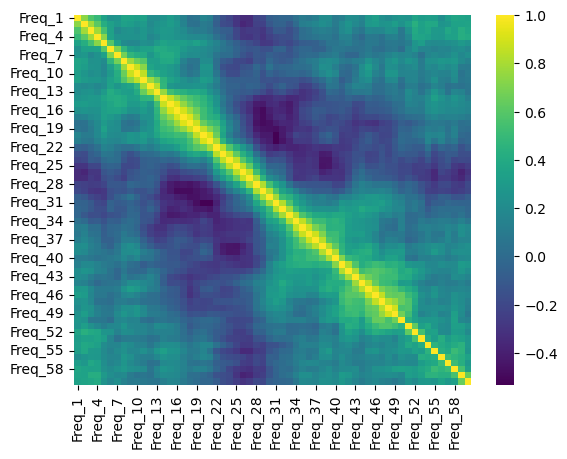

In [115]:
sns.heatmap(data.corr(),cmap = 'viridis')

What are the Top 5 correlation features with the target value?

In [117]:
df['Label'] = df['Label'].map({'R':0,'M':1})

In [120]:
corr_df = df.corr()
corr_df = corr_df.loc[['Label']]
corr_list = corr_df.iloc[0]
corr_list = np.abs(corr_list).sort_values()
corr_list.tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Label      1.000000
Name: Label, dtype: float64

In [122]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,label,test_size = 0.1,random_state = 42)


In [124]:
# Creating a Pipeline that contains StandardScaler and Knn model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
scaler = StandardScaler()
operations = [('scaler',scaler),('knn',knn)]
pipeline = Pipeline(operations)
k_values = list(range(1,30))
paramgrid = {'knn__n_neighbors': k_values}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(pipeline,paramgrid,cv = 5,scoring = 'accuracy')
model.fit(x_train,y_train)

model.best_estimator_.get_params()


{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [125]:
dataframe = pd.DataFrame(model.cv_results_)

Text(0, 0.5, 'Accuracy')

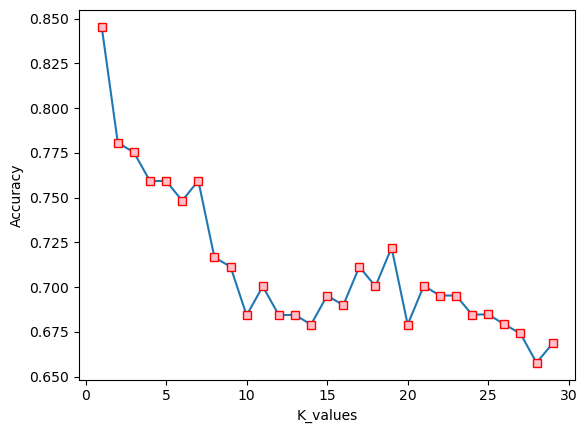

In [126]:
plt.plot(dataframe['param_knn__n_neighbors'],dataframe['mean_test_score'],marker = "s",mfc ="Pink",mec ="Red")
plt.xlabel('K_values')
plt.ylabel('Accuracy')

 MODEL EVALUATION:

In [128]:
prediction = model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,prediction)

print("Accuracy:",accuracy)
print("\nConfusion_matrix:")
print(confusion_matrix(y_test,prediction))
print("\nClassification Report:")
print(classification_report(y_test,prediction))

Accuracy: 0.9047619047619048

Confusion_matrix:
[[12  1]
 [ 1  7]]

Classification Report:
              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

